Loaded graph with 27770 nodes


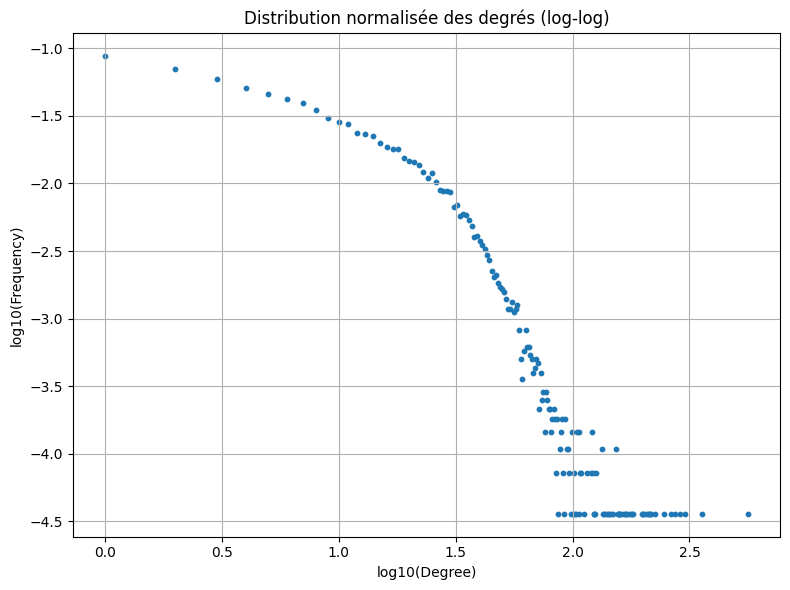

PNG enregistré: degree_distribution_loglog.png


In [1]:
import math
import matplotlib.pyplot as plt
import urllib.request

CITATION_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_phys-cite.txt"

def load_graph(url):
    # on lit, on décode et on découpe proprement les lignes
    text = urllib.request.urlopen(url).read().decode("utf-8", errors="ignore")
    lines = text.splitlines()  # gère \r\n et \n
    print("Loaded graph with", len(lines), "nodes")
    g = {}
    for line in lines:
        if not line.strip():
            continue
        parts = line.strip().split()   # <-- le fix: split sur tout whitespace
        node = int(parts[0])
        g[node] = set(int(n) for n in parts[1:])
    return g

def degree_distribution(graph):
    dist = {}
    for node, nbrs in graph.items():
        d = len(nbrs)
        dist[d] = dist.get(d, 0) + 1
    return dist

def normalize(dist):
    total = sum(dist.values())
    return {k: v/total for k, v in dist.items()}

# --- main ---
graph = load_graph(CITATION_URL)
dist = degree_distribution(graph)
norm = normalize(dist)

# points log/log (on ignore degré 0)
xs, ys = [], []
for d, f in norm.items():
    if d > 0 and f > 0:
        xs.append(math.log10(d))
        ys.append(math.log10(f))

plt.figure(figsize=(8,6))
plt.scatter(xs, ys, s=10)
plt.title("Distribution normalisée des degrés (log-log)")
plt.xlabel("log10(Degree)")
plt.ylabel("log10(Frequency)")
plt.grid(True)
plt.tight_layout()
plt.savefig("degree_distribution_loglog.png", dpi=300)
plt.show()
print("PNG enregistré: degree_distribution_loglog.png")
